# Risk-taking among students: Does age, gender or nationality matter?

##### Analysis by Lukas Dzenkauskas
###### 07/04/2020

## Introduction

A little while ago I got the hold of a dataset of my fellow behavioural and experimental finance course students which were asked to make a bet from 0 to 100 (imaginary) euros, with a 1/6 chance to win 8x the amount bet, for 15 periods. The budget for each period of betting is 100. Any amount that is not used for betting for each period is kept as a ‘winning’. Additionally, age, gender and nationality data was provided.

Given this data, I thought of a few questions that might be interesting to answer.
It is often assumed that younger people are more impulsive and have tendency to take on more risks. But after all, the age of 18 to 22 is a time for significant personal growth and maturing. So, is it to possible observe a significant difference in the degree of risk taking in such a relatively short period of time? Let’s set the first null and alternative hypotheses: 
<br><i>Ho</i>: Age has no effect on the average bet amount.
<br><i>Ha</i>: Older students will bet less on average.
<p>
Additionally, since the gender of each participant is available, we can look into the role it plays when faced with financial risk taking. Although this has been shown by numerous studies, we can try and replicate the results in a more specific context dataset. The hypotheses are as follows:
<br><i>Ho</i>: Gender has no effect on the average bet amount.
<br><i>Ha</i>: Women will choose to bet less on average than men.
<p>
And finally, we also have nationality. Although it only says whether the participant is Dutch or not, we can investigate if the pragmatic Dutch thinking plays a role in risk taking compared to the rest of the nationalities. Since the expected value (chance of winning multiplied by amount) is higher when betting more, in purely pragmatic sense, it should be more reasonable to bet more.
<br><i>Ho</i>: Nationality has no effect on the average bet amount.
<br><i>Ha</i>: Dutch students will choose to bet more on average than other nationalities.



## Data exploration & Cleaning

### Importing modules

In [27]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import random as r  # for the jiggle function
import seaborn as sns # for heatmap

### Importing data

In [28]:
df = pd.read_excel(r'C:\Users\Lukas\OneDrive\University\Year 3\Behavioral Finance\Project\Python\BEF_Project\BF20.xlsx', sheet_name=1)

### Inspecting general data

In [29]:
df.describe()

,Dice1,Inv1,Gain1,Pay1,Total1,Dice2,Inv2,Gain2,Pay2,Total2,...,Gain14,Pay14,Total14,Dice15,Inv15,Gain15,Pay15,female,dutch,age
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,...,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.00000
mean,3.376623,42.181818,7.376623,107.376623,107.376623,3.337662,41.025974,-1.636364,98.363636,205.740260,...,36.675325,136.675325,1573.428571,3.870130,41.545455,42.376623,142.376623,0.363636,0.779221,1997.25974
std,1.762467,30.765123,143.108262,143.108262,143.108262,1.651239,32.028348,136.054063,136.054063,189.861612,...,218.272309,218.272309,609.490564,1.688589,37.459995,221.528722,221.528722,0.484200,0.417492,2.46770
min,1.000000,0.000000,-100.000000,0.000000,0.000000,1.000000,0.000000,-100.000000,0.000000,0.000000,...,-100.000000,0.000000,0.000000,1.000000,0.000000,-100.000000,0.000000,0.000000,0.000000,1986.00000
25%,2.000000,20.000000,-50.000000,50.000000,50.000000,2.000000,17.000000,-50.000000,50.000000,100.000000,...,-60.000000,40.000000,1248.000000,3.000000,10.000000,-50.000000,50.000000,0.000000,1.000000,1997.00000
50%,3.000000,30.000000,-25.000000,75.000000,75.000000,3.000000,30.000000,-25.000000,75.000000,160.000000,...,-19.000000,81.000000,1505.000000,4.000000,30.000000,-20.000000,80.000000,0.000000,1.000000,1998.00000
75%,5.000000,60.000000,-12.000000,88.000000,88.000000,5.000000,60.000000,-10.000000,90.000000,249.000000,...,-1.000000,99.000000,1794.000000,5.000000,67.000000,0.000000,100.000000,1.000000,1.000000,1999.00000
max,6.000000,100.000000,640.000000,740.000000,740.000000,6.000000,100.000000,800.000000,900.000000,900.000000,...,800.000000,900.000000,3194.000000,6.000000,100.000000,800.000000,900.000000,1.000000,1.000000,2000.00000


Removing the unnecessary columns (Dice, Gain, Total) by filtering them out using regex function.<br>
To have only the variables of interest: Amount bet per period, female (gender), dutch (nationality) and year of birth:

In [30]:
df = df.filter(regex='fem|dut|age|Inv')

Checking if the data types are correct and if no values are missing:

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Inv1    77 non-null     int64
 1   Inv2    77 non-null     int64
 2   Inv3    77 non-null     int64
 3   Inv4    77 non-null     int64
 4   Inv5    77 non-null     int64
 5   Inv6    77 non-null     int64
 6   Inv7    77 non-null     int64
 7   Inv8    77 non-null     int64
 8   Inv9    77 non-null     int64
 9   Inv10   77 non-null     int64
 10  Inv11   77 non-null     int64
 11  Inv12   77 non-null     int64
 12  Inv13   77 non-null     int64
 13  Inv14   77 non-null     int64
 14  Inv15   77 non-null     int64
 15  female  77 non-null     int64
 16  dutch   77 non-null     int64
 17  age     77 non-null     int64
dtypes: int64(18)
memory usage: 11.0 KB


Renaming age column to age of birth:

In [32]:
df.rename(columns={'age': 'YoB'}, inplace=True)

### Inspecting individual variables

#### Average bet

##### Calculating the average bet per person:

In [33]:
df['Avg_bet'] = df.filter(regex='Inv').mean(axis=1)

Dropping the no longer needed bet per period columns:

In [34]:
df = df[['Avg_bet', 'female', 'dutch', 'YoB']]

We end up with a dataset that looks like this:

In [35]:
df.head(5)

,Avg_bet,female,dutch,YoB
0,60.6,0,0,1986
1,10.0,0,1,1988
2,28.2,0,1,1994
3,100.0,0,1,1994
4,18.0,0,1,1994


##### Visually inspecting the average bet variable via a histogram:

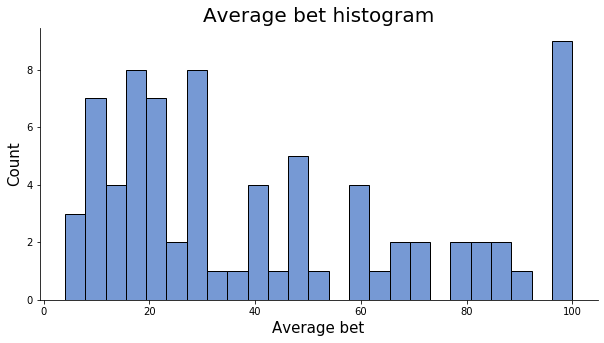

In [36]:
# Setting a figure size
plt.figure(figsize=(10, 5))

# Plotting the histogram and adding labels
plt.hist(df.Avg_bet, bins=25, color='#7699D4', edgecolor='black')
plt.xlabel('Average bet', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Average bet histogram', fontsize=20)

# Removing top and right part of the frame
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Saving the figure
plt.savefig('histogram.png', dpi=600)

There are some outliers (people who chose to go all in, betting the maximum 100 EUR every time), however it is a real and important observation, therefore we will keep it.

Visually, the average bet seems to be slightly skewed to the right. To be sure, we can test for that using pandas skew() function:

In [37]:
df['Avg_bet'].skew()

0.6449460589435086

Additionally, I check for kurtosis:

In [38]:
df['Avg_bet'].kurtosis()

-0.93381782465103

Rule of thumb is that values -0.8 to 0.8 for skewness and -3.0 to 3.0 for kurtosis are nothing to worry about (in terms of having a significant impact on the regression results).

#### Year of birth and age

In [39]:
df['YoB'].value_counts()

1999    20
1998    20
1997    14
1996     6
1995     6
2000     5
1994     3
1989     1
1988     1
1986     1
Name: YoB, dtype: int64

Transforming year of birth into age:

In [40]:
# Setting all of the Age values to 0, so that they can
# be removed if the function below doesn't assign it a value
df['Age'] = 0

# Replacing Year of birth with relative 'Age' variable, so that it can be
# used more intuitively in the regression (higher age = older,
# instead of lower birth year = older)
y = 27  # Values to replace corresponding years
for year in range(1994, 2001):  # Year range to replace
    y -= 1
    df.loc[df['YoB'] == year, 'Age'] = y

Removing ages that: 
<br>- Have only 1 observation 
<br>- Are outliers (major age difference)
<br>To reduce error in the regression analysis

In [41]:
# Dropping ages that have only 1 observation
df = df.loc[df['Age'] != 0, :]

In [42]:
df.head(5)

,Avg_bet,female,dutch,YoB,Age
2,28.200000,0,1,1994,26
3,100.000000,0,1,1994,26
4,18.000000,0,1,1994,26
5,33.000000,0,1,1995,25
6,19.933333,0,1,1995,25


In [43]:
# Removing the YoB column
df = df.drop('YoB', axis=1)

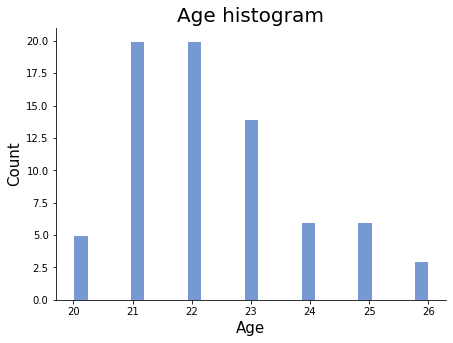

In [44]:
# Setting a figure size
plt.figure(figsize=(7, 5))

# Plotting the histogram and adding labels
plt.hist(df['Age'], bins=25, color='#7699D4', edgecolor='white')
plt.ylabel('Count', fontsize=15)
plt.xlabel('Age', fontsize=15)
plt.title('Age histogram', fontsize=20)

# Removing top and right part of the frame
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Saving the figure
plt.savefig('Count vs age (hist).png', dpi=600)

In [45]:
df['Age'].skew()

0.6789652872482161

In [46]:
df['Age'].kurtosis()

-0.15852396846247574

#### Correlations: Average bet vs independent variables

Visually exploring data to see the trends between correlations.

<i>Creating 'jitter' functions, which move around the scatter dots slightly, to avoid the issue of overlaid scatter dots, so that all of the dots can be seen.

In [47]:
# Jitter function for dot visibility (when overlapping)
j = 0.025  # value for jitterness, 0.05 is medium
def rand_jitter(arr):  # doesn't work if there's 1 value (eg. 0, in the column, it must have at least 2, because max - min always = 0)
    stdev = 0.01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev
def rand_jitter1(arr):  # Version 2 for columns with 1 value (THAT IS NOT 0)
    stdev = j*(max(arr))
    return arr + np.random.randn(len(arr)) * stdev
def rand_jitter0(arr):  # Version3 for columns with 1 value (THAT IS 0)
    return arr + np.random.randn(len(arr)) * j

##### Average bet by gender

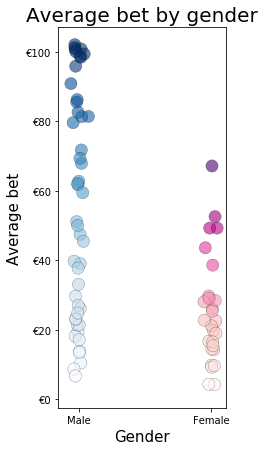

In [48]:
# Setting a figure size for ONE upcoming figure (in inches) (this must be done before creating any figures)
plt.figure(figsize=(3, 7))

# selecting male data
df_avg_male_bet = df.loc[df['female'] == 0, 'Avg_bet']
male = df.loc[df['female'] == 0, 'female']
# selecting female data
df_avg_fem_bet = df.loc[df['female'] == 1, 'Avg_bet']
female = df.loc[df['female'] == 1, 'female']

# Plotting
# Males
plt.scatter(rand_jitter0(male), rand_jitter(df_avg_male_bet), alpha=0.6, s=150, c=df_avg_male_bet, cmap='Blues', edgecolor='black', linewidth=0.3)
# Females
plt.scatter(rand_jitter1(female), rand_jitter(df_avg_fem_bet), alpha=0.6, s=150, c=df_avg_fem_bet, cmap='RdPu', edgecolor='black', linewidth=0.3)

# adjusting
plt.title('Average bet by gender', fontsize=20)
plt.ylabel('Average bet', fontsize=15)
plt.xlabel('Gender', fontsize=15)
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.yticks(ticks=[0, 20, 40, 60, 80, 100], labels=['€0', '€20', '€40', '€60', '€80', '€100'])

# Saving the figure
plt.savefig('Average bet by gender.png', dpi=600)

We can clearly see a difference between the genders, it is a good sign that a relationship will be found during the regression analysis.
<p>Furthermore, we can also visualize the same data using a histogram, which can help see the points which were originally overlaid (for example where men bet exactly 100 Eur each time).

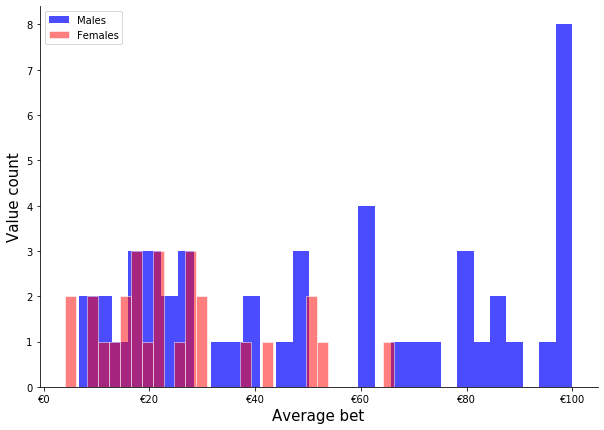

In [49]:
# Setting a figure size any figures)
plt.figure(figsize=(10, 7))

# Plotting histograms
plt.hist(df_avg_male_bet, bins=30, alpha=0.7, label='Males', color='blue')
plt.hist(df_avg_fem_bet, bins=30, alpha=0.5, label='Females', color='red', edgecolor='white')
plt.ylabel('Value count', fontsize=15)
plt.xlabel('Average bet', fontsize=15)
plt.legend(loc='upper left')
plt.xticks(ticks=[0, 20, 40, 60, 80, 100], labels=['€0', '€20', '€40', '€60', '€80', '€100'])

# Removing top and right part of the frame
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Saving the figure
plt.savefig('Average bet by age (hist).png', dpi=600)

##### Average bet by nationality

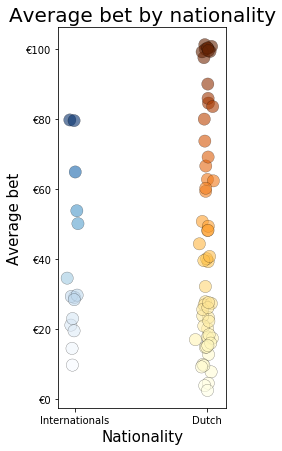

In [50]:
# Setting a figure size for ONE upcoming figure (in inches) (this must be done before creating any figures)
plt.figure(figsize=(3, 7))

# selecting dutch data
df_avg_dutch_bet = df.loc[df['dutch'] == 1, 'Avg_bet']
dutch = df.loc[df['dutch'] == 1, 'dutch']
# selecting international data
df_avg_intern_bet = df.loc[df['dutch'] == 0, 'Avg_bet']
intern = df.loc[df['dutch'] == 0, 'dutch']

# Plotting
# Dutch
plt.scatter(rand_jitter1(dutch), rand_jitter(df_avg_dutch_bet), alpha=0.6, s=150, c=df_avg_dutch_bet, cmap='YlOrBr', edgecolor='black', linewidth=0.3)
# Internationals
plt.scatter(rand_jitter0(intern), rand_jitter(df_avg_intern_bet), alpha=0.6, s=150, c=df_avg_intern_bet, cmap='Blues', edgecolor='black', linewidth=0.3)

# adjusting
plt.title('Average bet by nationality', fontsize=20)
plt.xlabel('Nationality', fontsize=15)
plt.ylabel('Average bet', fontsize=15)
plt.xticks(ticks=[0, 1], labels=['Internationals', 'Dutch'])
plt.yticks(ticks=[0, 20, 40, 60, 80, 100], labels=['€0', '€20', '€40', '€60', '€80', '€100'])

# Saving the figure
plt.savefig('Average bet by nationality.png', dpi=600)

There's little that can be derived from this plot, especially since the sample size differs quite a lot between the nationalities. Overall the distribution seems similar.

##### Bet by age

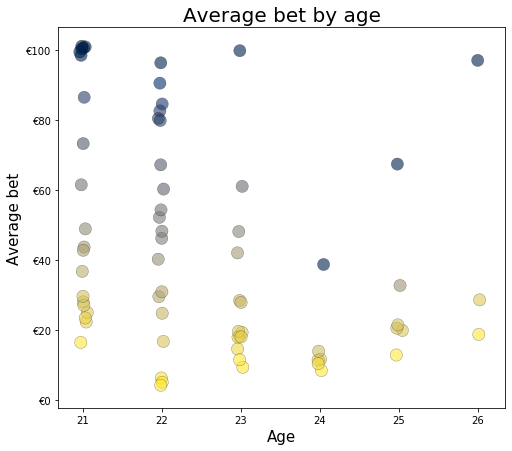

In [51]:
# Setting a figure size
plt.figure(figsize=(8, 7))

# selecting 21
y21 = df.loc[df['Age'] == 21, 'Age']
avg21bet = df.loc[df['Age'] == 21, 'Avg_bet']
# selecting 22
y22 = df.loc[df['Age'] == 22, 'Age']
avg22bet = df.loc[df['Age'] == 22, 'Avg_bet']
# selecting 23
y23 = df.loc[df['Age'] == 23, 'Age']
avg23bet = df.loc[df['Age'] == 23, 'Avg_bet']
# selecting 24
y24 = df.loc[df['Age'] == 24, 'Age']
avg24bet = df.loc[df['Age'] == 24, 'Avg_bet']
# selecting 25
y25 = df.loc[df['Age'] == 25, 'Age']
avg25bet = df.loc[df['Age'] == 25, 'Avg_bet']
# selecting 26
y26 = df.loc[df['Age'] == 26, 'Age']
avg26bet = df.loc[df['Age'] == 26, 'Avg_bet']

# Plotting
# 21
plt.scatter(rand_jitter0(y21), rand_jitter(avg21bet), alpha=0.6, s=150, c=avg21bet, cmap='cividis_r', edgecolor='black', linewidth=0.3)
# 22
plt.scatter(rand_jitter0(y22), rand_jitter(avg22bet), alpha=0.6, s=150, c=avg22bet, cmap='cividis_r', edgecolor='black', linewidth=0.3)
# 23
plt.scatter(rand_jitter0(y23), rand_jitter(avg23bet), alpha=0.6, s=150, c=avg23bet, cmap='cividis_r', edgecolor='black', linewidth=0.3)
# 24
plt.scatter(rand_jitter0(y24), rand_jitter(avg24bet), alpha=0.6, s=150, c=avg24bet, cmap='cividis_r', edgecolor='black', linewidth=0.3)
# 25
plt.scatter(rand_jitter0(y25), rand_jitter(avg25bet), alpha=0.6, s=150, c=avg25bet, cmap='cividis_r', edgecolor='black', linewidth=0.3)
# 26
plt.scatter(rand_jitter0(y26), rand_jitter(avg26bet), alpha=0.6, s=150, c=avg26bet, cmap='cividis_r', edgecolor='black', linewidth=0.3)

# adjusting
plt.title('Average bet by age', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Average bet', fontsize=15)
plt.yticks(ticks=[0, 20, 40, 60, 80, 100], labels=['€0', '€20', '€40', '€60', '€80', '€100'])

# Saving the figure
plt.savefig('Average bet by age.png', dpi=600)

Starting from the age of 21 up until 23 (or perhaps even 24), a noticeable decline in risk-taking behaviour can be observed. Further analysis is difficult due to a small number of observations.

## Data analysis

#### Checking for multicollinearity

Multicollinearity increases the estimate of standard error of regression coefficients which makes some variables statistically insignificant when they should be significant.<br>
<br>General guidelines for correlation value and its evaluation:
<br>0.0 – 0.2	Weak correlation
<br>0.3 – 0.6	Moderate correlation
<br>0.7 – 1.0	Strong correlation

##### Correlation matrix

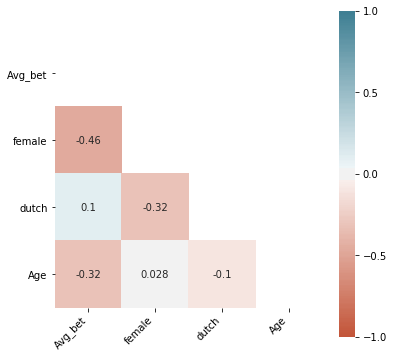

In [52]:
# Creating a correlation matrix
# cdf = df.drop('Avg_bet', axis=1)  # Creates a correlation matrix without dependent Avg_bet variable
corr = df.corr()

# Creating a mask for the heatmap (removes upper part of the triangle - redundant information)
mask = np.zeros_like(corr, dtype=np.bool)  # Copy the df shape and fill it with 0's
mask[np.triu_indices_from(mask)] = True  # Select upper triangle of array

# Creating a heatmap
plt.figure(figsize=(6, 6))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cbar_kws={"ticks": [-1, -0.5, 0, 0.5, 1]},  # setting colorbar tick values
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    mask=mask)

# Tweaking X-axis labels
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

# Tweaking Y-axis labels
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0)

# Saving the figure
plt.savefig('Correlation matrix heatmap.png', dpi=600)

There is slight correlation between the nationality (dutch) and gender (female) variables. VIF will provide more detailed results.
<br>
<i>Note: Avg_bet is included for exploring the possible relationships between variables, but does not play a role in multicollinearity.

##### VIF

In [53]:
# Import function
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get variables for which to compute VIF and add intercept term
x = df[['female', 'dutch', 'Age']]
x['Intercept'] = 1  # Using statsmodels VIF calculation requires adding the intercept column, because it is not done so automatically, and otherwise will result in incorrect VIF values.

# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

# Dropping the intercept row
vif = vif.drop(3)

# View results using print
print(vif)

  variables       VIF
0    female  1.111054
1     dutch  1.122474
2       Age  1.011098


##### Interpretation of VIF

VIF = 1 Not correlated

1 < VIF < 5 Moderately correlated

VIF > 5 Highly correlated

##### Visual representation of VIF

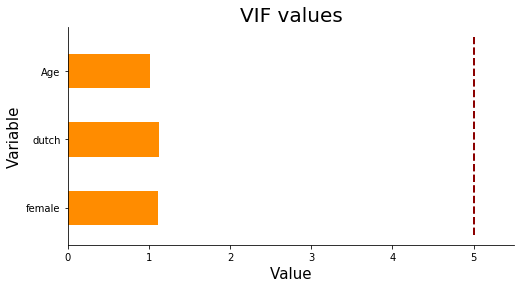

In [54]:
# Setting figure size
plt.figure(figsize=(8, 4))

# Plotting a horizontal bar chart
b = plt.barh(y=vif['variables'], width=vif['VIF'],
        height=0.5, color='darkorange')

# adjusting
plt.title('VIF values', fontsize=20)
plt.xlabel('Value', fontsize=15)
plt.ylabel('Variable', fontsize=15)

# Removing top and right part of the frame
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# draw vertical line from (70, 100) < x ,x coordinates  to (70, 250) < y, y coordinates
plt.plot([5, 5], [-0.4, 2.5], '--', lw=2, color='darkred')

# Setting x value limits (plt.xlim used instead of b.set_xlim because of barh type of chart)
plt.xlim([0, 5.5])

# Saving the figure
plt.savefig('VIF values graph.png', dpi=600)

VIF's value of ~1 shows close to no multicorrelation (while the value of concern is usually said to be between 5 and 10).

### Regression

In [55]:
# Regression variables
X = df[['female', 'dutch', 'Age']]
Y = df['Avg_bet']

# Running the regression
X = sm.add_constant(X)  # add an intercept (beta_0) to our model
model = sm.OLS(Y, X).fit()  # cov_type="HC1" makes the regression model robust

# Print out the regression output
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Avg_bet   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     10.56
Date:                Fri, 17 Apr 2020   Prob (F-statistic):           8.17e-06
Time:                        10:16:58   Log-Likelihood:                -344.20
No. Observations:                  74   AIC:                             696.4
Df Residuals:                      70   BIC:                             705.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        199.5702     46.161      4.323      0.0

#### Evaluating the quality of the model

##### Residuals plot

One way, to see how reliable is the regression model, is to plot the residuals against predicted values, and visually check if they are randomly distributed.

Residual = Observed – Predicted

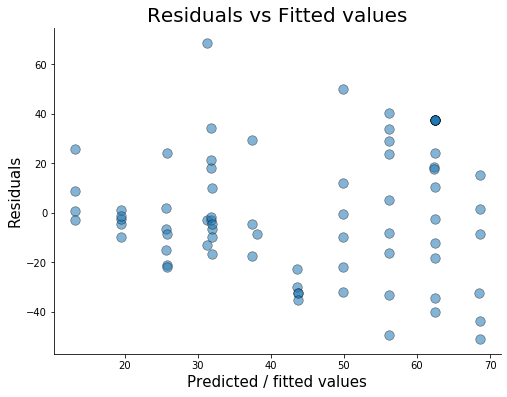

In [56]:
# Setting figure size
plt.figure(figsize=(8, 6))

# Calculating predicted values and assigning them to the df
predicted = model.predict(X)

# Calculating residuals (manual method, unnecessary as statsmodels provides model.resid)
# residual = df.Avg_bet - predicted  # manual method

# Plotting
plt.scatter(predicted, model.resid, alpha=0.55,
                 s=90, linewidth=0.6, edgecolors='black')

# Removing top and right part of the frame
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Setting axies labels
plt.xlabel('Predicted / fitted values', fontsize=15)
plt.ylabel('Residuals', fontsize=15)
plt.title('Residuals vs Fitted values', fontsize=20)

# Saving the figure
plt.savefig('Residuals vs fitted values', dpi=600)

There seems to be a chance of heteroscedasticity, therefore I will try to check for it formally via tests later on.

##### Distribution of residuals

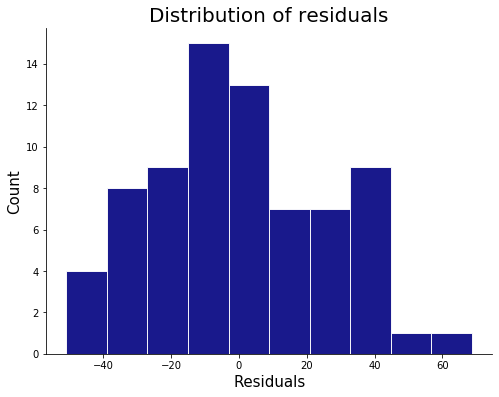

In [57]:
# Setting figure size
plt.figure(figsize=(8, 6))

# Plotting
plt.hist(model.resid, color='navy', alpha=0.9, edgecolor='white')

# Removing top and right part of the frame
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Setting axies labels
plt.xlabel('Residuals', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Distribution of residuals', fontsize=20)

# Saving the figure
plt.savefig('Distribution (hist) of residuals.png', dpi=600)

Residuals seem to be normaly distributed, which validates the model's normality assumption.

#### Heteroscedasticity

In [58]:
# White's test for heteroscedasticity
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip  # nicely formated print function

keys1 = ['Lagrange Multiplier statistic:', 'LM test\'s p-value:', 'F-statistic:', 'F-test\'s p-value:']
wtest = het_white(model.resid, model.model.exog)

lzip(keys1, wtest)

# Interpretation:
# Heteroscedasticity if p-value is significant

[('Lagrange Multiplier statistic:', 14.643625279316966),
 ("LM test's p-value:", 0.040848819921965096),
 ('F-statistic:', 2.3260933230675147),
 ("F-test's p-value:", 0.03488191532053086)]

In [59]:
# Breush-Pagan test for heteroscedasticity:
import statsmodels.stats.api as sms  # het_breuschpagan test

keys2 = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
bp_test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(keys2, bp_test)

[('Lagrange multiplier statistic', 12.891702169861484),
 ('p-value', 0.004876756119480082),
 ('f-value', 4.922512893413918),
 ('f p-value', 0.0036834454592528315)]

Both models detect heteroscedasticity, therefore Robust Standard Errors will be used.

#### Regression with robust standard errors

In [60]:
# Regression variables
X = df[['female', 'dutch', 'Age']]
Y = df['Avg_bet']

# Running the regression
X = sm.add_constant(X)  # add an intercept (beta_0) to our model
robust_model = sm.OLS(Y, X).fit(cov_type="HC1")  # cov_type="HC1" makes the regression model robust

# Print out the regression output
print(robust_model.summary())

                            OLS Regression Results                            
Dep. Variable:                Avg_bet   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     13.68
Date:                Fri, 17 Apr 2020   Prob (F-statistic):           4.07e-07
Time:                        10:17:03   Log-Likelihood:                -344.20
No. Observations:                  74   AIC:                             696.4
Df Residuals:                      70   BIC:                             705.6
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        199.5702     53.834      3.707      0.0

##### Interpreting the results

I find that Gender and Age are both statistically significant and therefore reject the age and gender null hypotheses, which give support to the alternative hypotheses which state that older students and women are more risk-averse and  will choose to bet more. In terms of nationality, we find that it is statistically insignificant with a p-value of 0.33, therefore we fail to reject the null hypothesis stating that nationality (being Dutch, versus being foreign) has no effect on risk-taking behaviour.

## Conclusion

Maybe it is not the question whether either of the groups were more risk taking & adventurous, but rather how seriously they took the thought experiment. Perhaps if the outcomes were more realistic – by having a real world impact on individual’s well-being, maybe then we would see different results. This is one of the issues that behavioural scientists encounter in the experimental design of the tests. 

Even though the predictive ability is questionable due to the sample size, data collection methods, and a sample bias, due to a group of people that should be more financially literate than other field students, nonetheless, it is a fun (and at least descriptive) analysis of the student risk-taking behaviour.
